# Estimating Retail Prices

**Importing libraries**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Dataset loading**

In [2]:
data=pd.read_csv("C:/Users/Sadneya/Downloads/sales.csv")

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


**Convert the data into a DataFrame**

In [4]:

df = pd.DataFrame(data)

**Step 1: Identify Target and Features**

In [5]:
target_column = 'Sales'  # Replace with the actual column for retail price if different
X = df.drop(columns=[target_column])
y = df[target_column]

**Step 2: Handle Categorical Columns**

In [6]:
categorical_columns = X.select_dtypes(include=['object']).columns

In [7]:
# Label Encoding for High Cardinality Columns
label_encoder = LabelEncoder()
high_cardinality_cols = ['State', 'Market', 'Product', 'Product Type', 'Type']
for col in high_cardinality_cols:
    if col in X.columns:
        X[col] = label_encoder.fit_transform(X[col])

In [8]:
# One-Hot Encoding for Low Cardinality Columns
low_cardinality_cols = ['Market Size']
X = pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

**Step 3: Handle Date Column**

In [9]:
if 'Date' in X.columns:
    X['Date'] = pd.to_datetime(X['Date'])
    X['Year'] = X['Date'].dt.year
    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X.drop(columns=['Date'], inplace=True)

C:\Users\Sadneya\AppData\Local\Temp\ipykernel_29380\699535460.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Date'] = pd.to_datetime(X['Date'])


**Step 4: Split Data into Training and Testing Sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Feature Scaling (Optional for Tree-Based Models)**

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 6: Train a Model**

In [12]:
# Using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Step 7: Predict on the Test Set**

In [13]:
y_pred = model.predict(X_test)

**Evaluate the Model**
- **Prediction**: Make predictions using the trained model on the test set.
- **Metrics**: Evaluate the performance using metrics like Mean Squared Error (MSE) and R².

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.49
R-squared: 1.00


**Model Interpretability**

In [16]:
# Optional: Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
Margin                      0.918697
COGS                        0.061808
Total Expenses              0.010682
Marketing                   0.002663
Profit                      0.001748
Budget Sales                0.001522
Inventory                   0.000786
Year                        0.000384
Budget COGS                 0.000359
Month                       0.000346
Budget Margin               0.000259
Budget Profit               0.000186
Area Code                   0.000155
Product                     0.000113
State                       0.000101
ProductId                   0.000091
Product Type                0.000053
Market Size_Small Market    0.000022
Market                      0.000017
Type                        0.000007
Day                         0.000000
dtype: float64


In [17]:
# Compare the predicted price with actual values in the test set
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(comparison_df.head())  # Check the first few predictions

# Calculate the error for each prediction
comparison_df['Error'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']
print(comparison_df)


      Actual Price  Predicted Price
718          545.0           544.40
3116         136.0           136.33
3061         223.0           222.84
2552         490.0           476.84
120          110.0           110.07
      Actual Price  Predicted Price  Error
718          545.0           544.40   0.60
3116         136.0           136.33  -0.33
3061         223.0           222.84   0.16
2552         490.0           476.84  13.16
120          110.0           110.07  -0.07
...            ...              ...    ...
907           75.0            75.31  -0.31
2603         567.0           567.14  -0.14
1338          95.0            94.99   0.01
3786         309.0           307.16   1.84
2791         604.0           603.68   0.32

[850 rows x 3 columns]


**Visualize the Results**

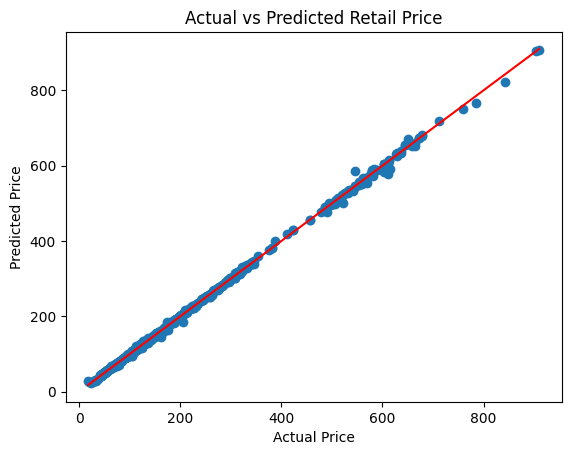

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Retail Price')
plt.show()


**Predictions on New Data**

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Sample training data
# Replace this with your actual training data and features
X_train = pd.DataFrame({
    'Area Code': [120, 121, 122],
    'State': ['California', 'Texas', 'Florida'],
    'Market': ['North', 'South', 'West'],
    'Market Size': ['Major', 'Small', 'Medium'],
    'Profit': [6000, 4000, 5000],
    'Sales': [22000, 15000, 18000],
    'COGS': [20000, 10000, 12000],
    'Total Expenses': [4000, 2000, 3000],
    'Marketing': [1500, 1000, 1200],
    'Inventory': [1000, 500, 700],
    'Budget Profit': [6200, 4200, 5300],
    'Budget Sales': [24000, 16000, 19000],
})

# Example target variable (Sales)
y_train = X_train['Sales']

# Preprocessing (e.g., Label Encoding and Scaling)
label_encoder = LabelEncoder()
X_train['State'] = label_encoder.fit_transform(X_train['State'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit', 'Budget Sales']])

# Train the model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
predicted_price = model.predict(X_train_scaled)
print(f'Predicted Retail Price for the New Product: ${predicted_price[0]:.2f}')



Predicted Retail Price for the New Product: $20400.00


**Conclusion:**
- **Metrics:** Use metrics like MSE and R² to evaluate accuracy.
- **Feature Importance:** Check the importance of features used by the model.
- **Cross-validation:** Use cross-validation to ensure consistency.
- **Direct Comparison:** Compare predicted values with actual values.
- **Visualization:** Visualize the model's predictions for a better understanding of its performance.